In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import nltk

In [ ]:
depression_dataset = pd.read_csv('/content/drive/My Drive/Master_Thesis/depression_dataset_reddit_cleaned.csv')
depression_dataset

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [ ]:
print(depression_dataset['clean_text'].isnull().sum())


0


In [ ]:
'Lowercasing'

for index, row in depression_dataset.iterrows():
    depression_dataset.at[index, 'clean_text'] = row['clean_text'].lower()

depression_dataset.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [ ]:
#Removing Punctuation & Special Characters
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(post):
    punctuation_free = "".join([chars for chars in post if chars not in string.punctuation])
    return punctuation_free

#storing the puntuation free text
depression_dataset['clean_text'] = depression_dataset['clean_text'].apply(remove_punctuation)

In [ ]:
pip install langdetect


In [ ]:
from langdetect import detect

# Function to check if text is in English
def is_english(text):
    try:
        lang = detect(text)
        return lang == 'en'
    except:
        return False

all_english = all(is_english(text) for text in depression_dataset['clean_text'])

# Print the result
if all_english:
    print("All text rows are in English.")
else:
    print("Not all text rows are in English.")

Not all text rows are in English.


In [ ]:
# Function to check if text is in English
def is_english(text):
    try:
        lang = detect(text)
        return lang == 'en'
    except:
        return False

non_english_posts = []

for index, row in depression_dataset.iterrows():
    if not is_english(row['clean_text']):
        non_english_posts.append(row['clean_text'])

for post in non_english_posts:
    print(post)

i m done et je n essaie m me plus j fatigu de rusher mentalement et m me le psychologues ne peuvent plus m aider a ne peut pa tre r solu j suis in comme a je ne sais pa ce que je fais ici je pourrai pa finir cette ann e inqui tez vous pa inqui tez vous juste plus je peux pa tre aid et je remarque que ma pr sence ne fait que tanner tout le monde je pourrai jamais m adapter penser normalement comprendre normalement et personne n a s puiser vouloir m aider l dedans
i m starting to lose hope i feel like i m on auto pilot i m not living i m existing
idk anymore i m just tired
just a motivational quote
f 0 i m feeling very lonely i need someone to talk to
i always feel like i dont matter
pls answerrr
ahhhhhhhhhhhhh
let s not leave anyone alone
doe anxiety get better after 0
filler text filler tezt
like fuck am i invisible
god im stupid
fuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuck
how do you get over it
my last post goodbye
im so tired
i dont even deserve to live
i am going to die tonigh

In [ ]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt

# Function to detect the language of text
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'Unknown'


depression_dataset['language'] = depression_dataset['clean_text'].apply(detect_language)

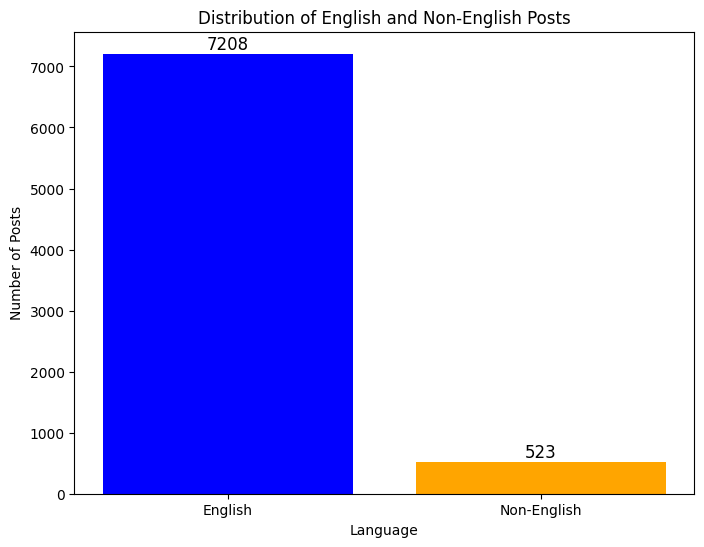

In [ ]:
english_count = (depression_dataset['language'] == 'en').sum()
non_english_count = len(depression_dataset) - english_count

labels = ['English', 'Non-English']
counts = [english_count, non_english_count]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=['blue', 'orange'])

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             str(count), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Language')
plt.ylabel('Number of Posts')
plt.title('Distribution of English and Non-English Posts')
plt.savefig('/content/drive/My Drive/Master_Thesis/Distribution_of_English_and_Non-English_Posts.png')
plt.show()

language
en    7208
fr     106
af      57
nl      36
it      36
so      35
cy      28
no      28
da      22
et      21
de      21
sv      21
tl      17
ca      15
id      14
pt       9
fi       7
es       6
ro       6
pl       6
sw       6
sq       6
hr       5
vi       5
sk       4
cs       2
lv       2
sl       1
tr       1
Name: count, dtype: int64


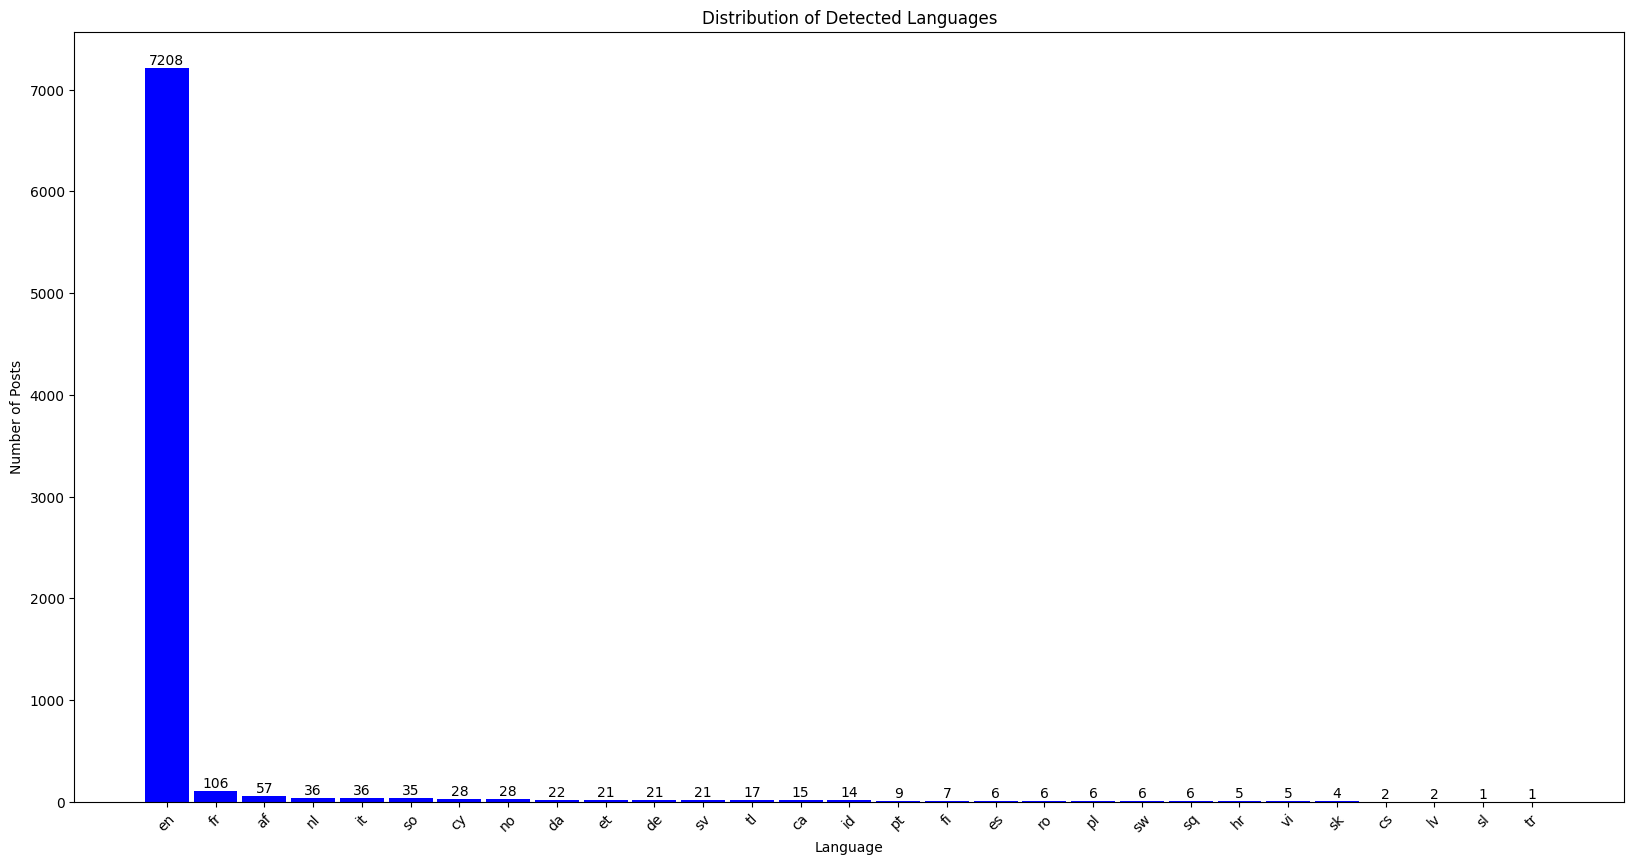

In [ ]:
import matplotlib.pyplot as plt

# Print the detailed language distribution
language_counts = depression_dataset['language'].value_counts()
print(language_counts)

# Create a plot for the distribution of all detected languages
plt.figure(figsize=(20, 10))
bars = plt.bar(language_counts.index, language_counts.values, color='blue', width=0.9)

# Annotate bars with counts
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, '%d' % height, ha='center', va='bottom')

plt.xlabel('Language')
plt.ylabel('Number of Posts')
plt.title('Distribution of Detected Languages')
plt.xticks(rotation=45)
plt.savefig('/content/drive/My Drive/Master_Thesis/Distribution_of_Detected_Languages.png')
plt.show()

'en: English
fr: French
af: Afrikaans
it: Italian
nl: Dutch
so: Somali
no: Norwegian
cy: Welsh
sv: Swedish
et: Estonian
tl: Tagalog (Filipino)
de: German
da: Danish
id: Indonesian
ca: Catalan
es: Spanish
sw: Swahili
pt: Portuguese
pl: Polish
sq: Albanian
fi: Finnish
vi: Vietnamese
cs: Czech
hr: Croatian
ro: Romanian
sk: Slovak
sl: Slovenian
tr: Turkish

lv       2
sl       1
tr       1

In [ ]:
#!pip install spellchecker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966500 sha256=134f933384d95018e533a38e3d1680aa54dfb53021db0ab488ee6cd1451e6327
  Stored in directory: /root/.cache/pip/wheels/6c/90/c3/eac248d8755b2a7343487a2087b4b29ad98f388c3c8c69c286
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7123 sha256=1bb87725c8d6c18ece5138edce08ab38840402a828821246e80e9974c8e34e63
  Stored in directory: /root/.cache/pip/wheels/63/19/2c/5e9f447f2533d457a1167c3e553f235e232b8a639e3f5fafab
  Created wheel for silpa_common: filename=silpa_common-0.3-py3-none-any.whl size=8466 sha256=f222e1042b92179db8e3fd9655d723771ae54c6273ceb6fe84923b192706f77a
  Stored in directory: /root/.cache/pip/wheels/c0/72/43/0c7

In [ ]:
"""
import os
from spellchecker import SpellChecker

# Get the list of available dictionary files in the spellchecker library
available_languages = [filename.split('.')[0] for filename in os.listdir(SpellChecker().word_frequency.dictionary_dir)]

print("Supported languages:", available_languages)
"""

ModuleNotFoundError: No module named 'indexer'